# Derivative-based Global Sensitivity Measure

In [6]:
from SALib.sample import saltelli, finite_diff
from SALib.analyze import dgsm
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, date
import time

import pickle
import json

import os
import argparse

In [13]:
N = 1000
with open(f'Studies/SAlib/SAlib_dgsm_{N}.pkl', 'rb') as f: 
    problem = pickle.load(f)
    X = pickle.load(f)
    sim_out = pickle.load(f)
    simulation_time = pickle.load(f)


In [14]:

def aggregate_output(sim_out, aggregation_function, output_no, keepdims = True):

    if aggregation_function == "max":
        output_agg = np.max(sim_out[:, :, output_no], axis = 1, keepdims = keepdims)
    elif aggregation_function == "sum":
        output_agg = np.sum(sim_out[:, :, output_no], axis = 1, keepdims=keepdims)
    elif aggregation_function == "mean":
        output_agg = np.mean(sim_out[:, :, output_no], axis = 1, keepdims=keepdims)
    elif aggregation_function == "mse":
        output_agg = ((np.array(sim_out[:, :, output_no]) - dataset[:, output_no])**2).mean(axis = 1, keepdims = keepdims)
    #print(f"Aggregated output is {aggregation_function} {output_compartment}.")
    return output_agg

#output_agg = np.squeeze(output_agg) or keepdims to False
Y = aggregate_output(sim_out,"max", 0 , False)
Y.shape


(81000,)

In [18]:
Si = dgsm.analyze(problem = problem, X = X, Y=Y, 
                        num_resamples=1000, conf_level=0.95, print_to_console=True, seed=None)

Si = Si.to_df()

                                    vi        vi_std      dgsm     dgsm_conf
dummy                     0.000000e+00  0.000000e+00  0.000000  0.000000e+00
incubation_time           2.840450e+05  6.883219e+05  0.020030  4.280940e+04
serial_interval           1.230364e+09  2.045487e+09  0.594214  1.243872e+08
infectious_mild_time      5.283065e+05  6.635987e+05  0.034729  4.147703e+04
hospitalized_to_ICU_time  2.538027e+05  4.450587e+05  0.034049  2.751788e+04
...                                ...           ...       ...           ...
deaths_per_ICU_4          2.287661e+07  4.229635e+07  0.007673  2.636672e+06
deaths_per_ICU_5          1.377852e+07  2.179518e+07  0.004621  1.379043e+06
init_exposed              2.097220e+01  5.311213e+01  0.007034  3.279387e+00
init_carrier              4.179143e+01  1.086247e+02  0.014016  6.781370e+00
init_infected             2.678804e+00  6.735293e+00  0.000002  4.064993e-01

[80 rows x 4 columns]


In [43]:
Si = Si.sort_values("vi", ascending = False)
Si

,vi,vi_std,dgsm,dgsm_conf
infection_probability_from_contact_3,5.868333e+09,1.094031e+10,1.968167e-02,6.827005e+08
infection_probability_from_contact_2,5.718739e+09,9.959998e+09,1.917995e-02,6.121229e+08
serial_interval,1.230364e+09,2.045487e+09,5.942142e-01,1.243872e+08
infection_probability_from_contact_4,3.879426e+08,5.346660e+08,1.301112e-03,3.360058e+07
infection_probability_from_contact_1,3.858687e+08,9.782087e+08,1.294156e-03,5.982377e+07
...,...,...,...,...
ICU_to_death_time_0,2.517923e-02,3.861486e-01,3.377921e-09,2.467706e-02
ICU_to_death_time_1,2.175755e-02,9.125100e-02,2.918885e-09,5.502600e-03
home_to_hospitalized_time_1,1.628312e-02,1.032826e-01,1.228761e-09,6.359666e-03
ICU_to_home_time_1,1.383313e-02,9.291634e-02,1.855785e-09,5.787858e-03


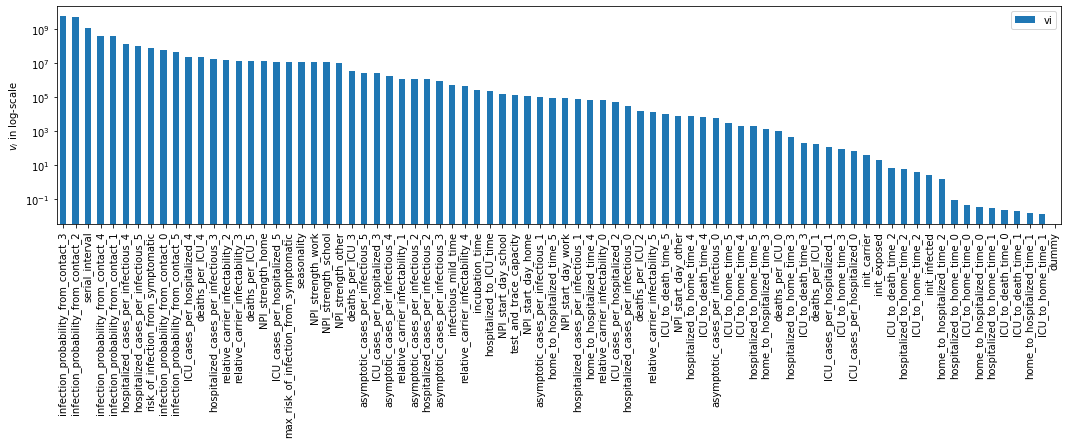

In [44]:
log = True
ax = Si.plot.bar(y='vi', rot=90, figsize = (18, 4))
if log:
    ax.set_yscale('log')
    ax.set_ylabel(r'$v_i$ in log-scale')
else:
    ax.set_ylabel(r'$v_i$')

In [61]:
t = Si.loc['NPI_strength_other','vi']
dgsm_important = Si['vi']<t
saving_path = 'results/dgsm_vi_important.csv'
dgsm_important.to_csv(saving_path)

In [41]:
Si = Si.sort_values("vi_std", ascending = False)
Si

,vi,vi_std,dgsm,dgsm_conf
infection_probability_from_contact_3,5.868333e+09,1.094031e+10,1.968167e-02,6.827005e+08
infection_probability_from_contact_2,5.718739e+09,9.959998e+09,1.917995e-02,6.121229e+08
serial_interval,1.230364e+09,2.045487e+09,5.942142e-01,1.243872e+08
infection_probability_from_contact_1,3.858687e+08,9.782087e+08,1.294156e-03,5.982377e+07
infection_probability_from_contact_4,3.879426e+08,5.346660e+08,1.301112e-03,3.360058e+07
...,...,...,...,...
hospitalized_to_home_time_1,3.283776e-02,2.587860e-01,1.101338e-09,1.620685e-02
home_to_hospitalized_time_1,1.628312e-02,1.032826e-01,1.228761e-09,6.359666e-03
ICU_to_home_time_1,1.383313e-02,9.291634e-02,1.855785e-09,5.787858e-03
ICU_to_death_time_1,2.175755e-02,9.125100e-02,2.918885e-09,5.502600e-03


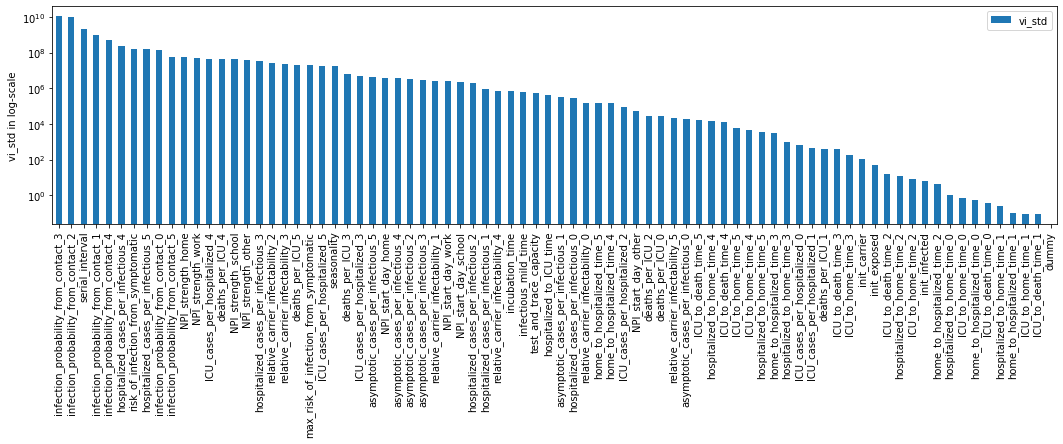

In [42]:
log = True
ax = Si.plot.bar(y='vi_std', rot=90, figsize = (18, 4))
if log:
    ax.set_yscale('log')
    ax.set_ylabel('vi_std in log-scale')
else:
    ax.set_ylabel('vi_std')

In [38]:
Si = Si.sort_values("dgsm", ascending = False)
Si

,vi,vi_std,dgsm,dgsm_conf
NPI_start_day_school,1.622364e+05,2.300369e+06,1.360302e+01,1.477792e+05
NPI_start_day_home,1.288912e+05,3.727309e+06,1.080713e+01,2.248072e+05
NPI_start_day_work,8.796071e+04,2.562879e+06,7.375235e+00,1.509490e+05
NPI_start_day_other,8.145479e+03,5.433246e+04,6.829733e-01,3.271214e+03
serial_interval,1.230364e+09,2.045487e+09,5.942142e-01,1.243872e+08
...,...,...,...,...
ICU_to_home_time_1,1.383313e-02,9.291634e-02,1.855785e-09,5.787858e-03
ICU_cases_per_hospitalized_0,7.341148e+01,6.384600e+02,1.538832e-09,4.049056e+01
home_to_hospitalized_time_1,1.628312e-02,1.032826e-01,1.228761e-09,6.359666e-03
hospitalized_to_home_time_1,3.283776e-02,2.587860e-01,1.101338e-09,1.620685e-02


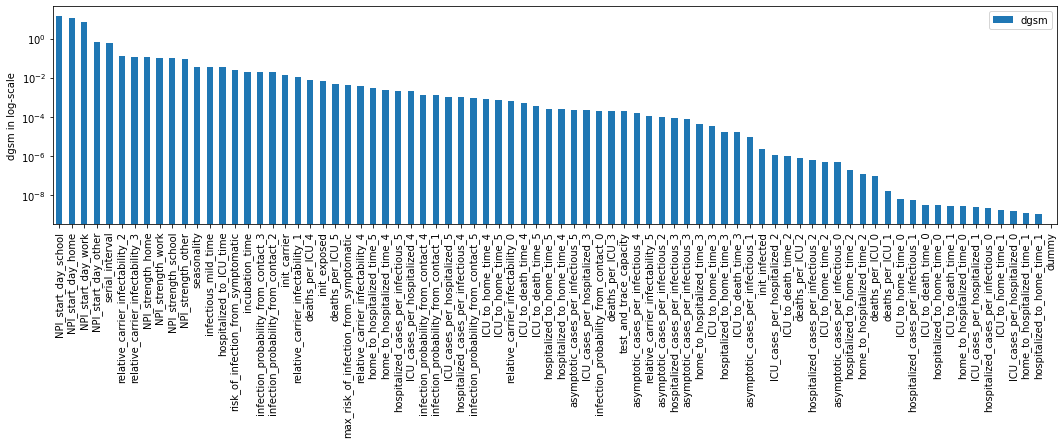

In [40]:
log = True
ax = Si.plot.bar(y='dgsm', rot=90, figsize = (18, 4))
if log:
    ax.set_yscale('log')
    ax.set_ylabel('dgsm in log-scale')
else:
    ax.set_ylabel('dgsm')